In [86]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')

In [87]:
books=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\Association rules\\book.csv")
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Top Selling books')

<Figure size 1200x800 with 0 Axes>

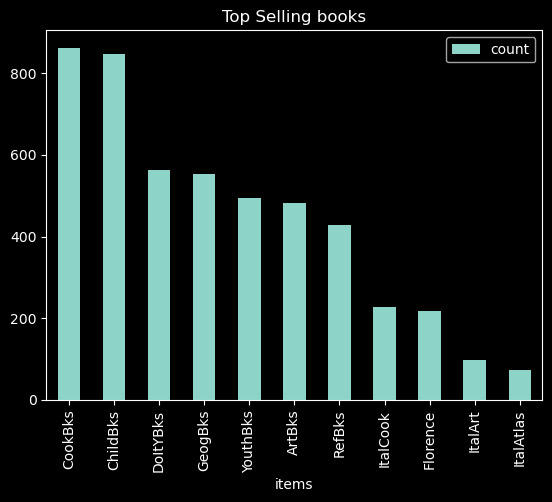

In [88]:
count = books.loc[:,:].sum()
df2 = count.sort_values(0, ascending = False).head(20)
df2 = df2.to_frame()
df2 = df2.reset_index()
df2 = df2.rename(columns = {'index': 'items',0: 'count'})

plt.style.use(style='dark_background')
fig=plt.figure(figsize=(12,8))
ax = df2.plot.bar(x = 'items', y ='count')
plt.title('Top Selling books')


## Association rules,min_support=0.05,'confidence',min_threshold=0.5,0.6,0.7,0.8,0.9,0.95

In [89]:
frequent_items=apriori(books,min_support=0.05,use_colnames=True)
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, YouthBks, DoItYBks, GeogBks)"
96,0.0560,"(CookBks, YouthBks, ArtBks, GeogBks)"
97,0.0650,"(CookBks, ArtBks, DoItYBks, GeogBks)"
98,0.0510,"(ChildBks, CookBks, YouthBks, DoItYBks, GeogBks)"


In [90]:
a_rules=association_rules(frequent_items,metric='confidence',min_threshold=0.5)
a_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548


In [91]:
r1=a_rules[a_rules['lift']>1]

In [92]:
a_rules['lift'].sort_values(ascending=False)

80     3.208789
208    3.208556
209    3.204346
259    3.065639
152    3.044665
         ...   
10     1.542677
3      1.542511
8      1.518667
1      1.404179
2      1.404179
Name: lift, Length: 260, dtype: float64

In [93]:
pivot1=r1.pivot(index='antecedents', columns='consequents', values='lift')
pivot1

consequents,(ChildBks),(CookBks),(YouthBks),(DoItYBks),(GeogBks),"(ChildBks, CookBks)",(RefBks),(ArtBks),"(YouthBks, CookBks)","(CookBks, DoItYBks)","(CookBks, GeogBks)","(ChildBks, DoItYBks)","(ChildBks, GeogBks)","(ChildBks, YouthBks)","(CookBks, ArtBks)"
antecedents,,,,,,,,,,,,,,,
(YouthBks),1.576044,1.518667,NaN,NaN,NaN,2.035985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(RefBks, CookBks)",1.899004,NaN,2.053320,1.964888,2.114517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.639765,NaN,NaN
"(CookBks, ArtBks, DoItYBks)",1.909886,NaN,2.089864,NaN,2.320268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.703044,NaN,NaN
"(RefBks, CookBks, DoItYBks)",2.084295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(YouthBks, ArtBks, GeogBks)",2.000364,1.998929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(DoItYBks, GeogBks)",1.864490,1.899926,2.073566,NaN,NaN,2.623821,NaN,2.286072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ArtBks, DoItYBks)",1.818512,1.906873,NaN,NaN,2.141642,2.593623,NaN,NaN,NaN,NaN,2.734108,NaN,NaN,NaN,NaN
"(RefBks, DoItYBks)",2.016739,1.858348,2.221265,NaN,2.009067,2.758442,NaN,2.104187,NaN,NaN,NaN,NaN,NaN,3.044665,NaN


In [94]:
a_rules1=association_rules(frequent_items,metric='confidence',min_threshold=0.6)
a_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
130,"(ChildBks, CookBks, ArtBks, GeogBks)",(DoItYBks),0.0835,0.282,0.0535,0.640719,2.272052,0.029953,1.998433
131,"(ChildBks, ArtBks, DoItYBks, GeogBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
132,"(CookBks, ArtBks, DoItYBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304
133,"(ChildBks, CookBks, DoItYBks, GeogBks)",(ArtBks),0.0890,0.241,0.0535,0.601124,2.494289,0.032051,1.902845


In [95]:
r2=a_rules1[a_rules1['lift']>1]

In [96]:
pivot2=r2.pivot(index='antecedents', columns='consequents', values='lift')

In [97]:
a_rules2=association_rules(frequent_items,metric='confidence',min_threshold=0.7)
a_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
...,...,...,...,...,...,...,...,...,...
82,"(YouthBks, CookBks, DoItYBks, GeogBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
83,"(YouthBks, DoItYBks, GeogBks)","(ChildBks, CookBks)",0.0680,0.256,0.0510,0.750000,2.929687,0.033592,2.976000
84,"(ChildBks, ArtBks, DoItYBks, GeogBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
85,"(CookBks, ArtBks, DoItYBks, GeogBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


In [98]:
r3=a_rules2[a_rules2['lift']>1]

In [99]:
pivot3=r3.pivot(index='antecedents', columns='consequents', values='lift')

In [100]:
a_rules3=association_rules(frequent_items,metric='confidence',min_threshold=0.8)
a_rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(YouthBks, GeogBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
...,...,...,...,...,...,...,...,...,...
57,"(ArtBks, DoItYBks, GeogBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(ChildBks, YouthBks, DoItYBks, GeogBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
59,"(YouthBks, CookBks, DoItYBks, GeogBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
60,"(ChildBks, ArtBks, DoItYBks, GeogBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583


In [101]:
r4=a_rules3[a_rules3['lift']>1]

In [102]:
pivot4=r4.pivot(index='antecedents', columns='consequents', values='lift')

In [103]:
a_rules4=association_rules(frequent_items,metric='confidence',min_threshold=0.9)
a_rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
2,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.000000,2.320186,0.033571,inf
3,"(ItalCook, DoItYBks)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf
4,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf
5,"(ItalCook, GeogBks)",(CookBks),0.0640,0.431,0.0640,1.000000,2.320186,0.036416,inf
6,"(RefBks, YouthBks, DoItYBks)",(ChildBks),0.0580,0.423,0.0530,0.913793,2.160267,0.028466,6.693200
7,"(RefBks, YouthBks, GeogBks)",(ChildBks),0.0570,0.423,0.0515,0.903509,2.135955,0.027389,5.979818
8,"(ChildBks, ItalCook, GeogBks)",(CookBks),0.0525,0.431,0.0525,1.000000,2.320186,0.029872,inf
9,"(ChildBks, YouthBks, DoItYBks, GeogBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182


In [104]:
r5=a_rules4[a_rules4['lift']>1]

In [105]:
pivot5=r5.pivot(index='antecedents', columns='consequents', values='lift')

In [106]:
a_rules5=association_rules(frequent_items,metric='confidence',min_threshold=0.95)
a_rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf
1,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf
2,"(YouthBks, ItalCook)",(CookBks),0.0590,0.431,0.0590,1.0,2.320186,0.033571,inf
3,"(ItalCook, DoItYBks)",(CookBks),0.0585,0.431,0.0585,1.0,2.320186,0.033287,inf
4,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.0,2.320186,0.032148,inf
5,"(ItalCook, GeogBks)",(CookBks),0.0640,0.431,0.0640,1.0,2.320186,0.036416,inf
6,"(ChildBks, ItalCook, GeogBks)",(CookBks),0.0525,0.431,0.0525,1.0,2.320186,0.029872,inf


In [107]:
r6=a_rules5[a_rules5['lift']>1]

In [108]:
pivot6=r6.pivot(index='antecedents', columns='consequents', values='lift')

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for min_support and different values of confidenece

Text(0.5, 1.0, 'support=0.1.confidence=0.95')

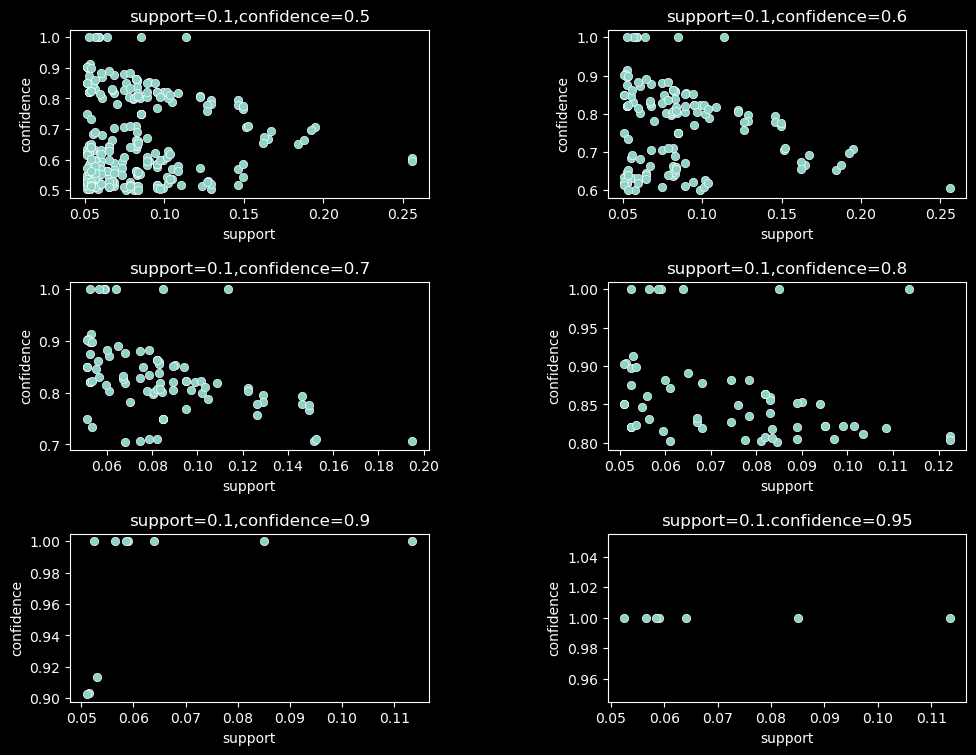

In [110]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.5,top=1.5, wspace=0.5,hspace=0.5)
#fig=plt.figure(figsize=(6,6))
plt.subplot(3,2,1)
sns.scatterplot(x=a_rules.support,y=a_rules.confidence)
plt.title('support=0.1,confidence=0.5')
plt.subplot(3,2,2)
sns.scatterplot(x=a_rules1.support,y=a_rules1.confidence)
plt.title('support=0.1,confidence=0.6')
plt.subplot(3,2,3)
sns.scatterplot(x=a_rules2.support,y=a_rules2.confidence)
plt.title('support=0.1,confidence=0.7')
plt.subplot(3,2,4)
sns.scatterplot(x=a_rules3.support,y=a_rules3.confidence)
plt.title('support=0.1,confidence=0.8')
plt.subplot(3,2,5)
sns.scatterplot(x=a_rules4.support,y=a_rules4.confidence)
plt.title('support=0.1,confidence=0.9')
plt.subplot(3,2,6)
sns.scatterplot(x=a_rules5.support,y=a_rules5.confidence)
plt.title('support=0.1.confidence=0.95')

## for min_support=0.1 and confidence=0.5,0.6,0.7,0.8,0.9,0.95
## This suggests that throwing out some low support rules would also mean that we would discard rules that are strong according to many common metrics
## Confidence indicates the number of times the if-then statements are found true.

Text(0.5, 1.0, 'support=0.1.confidence=0.95')

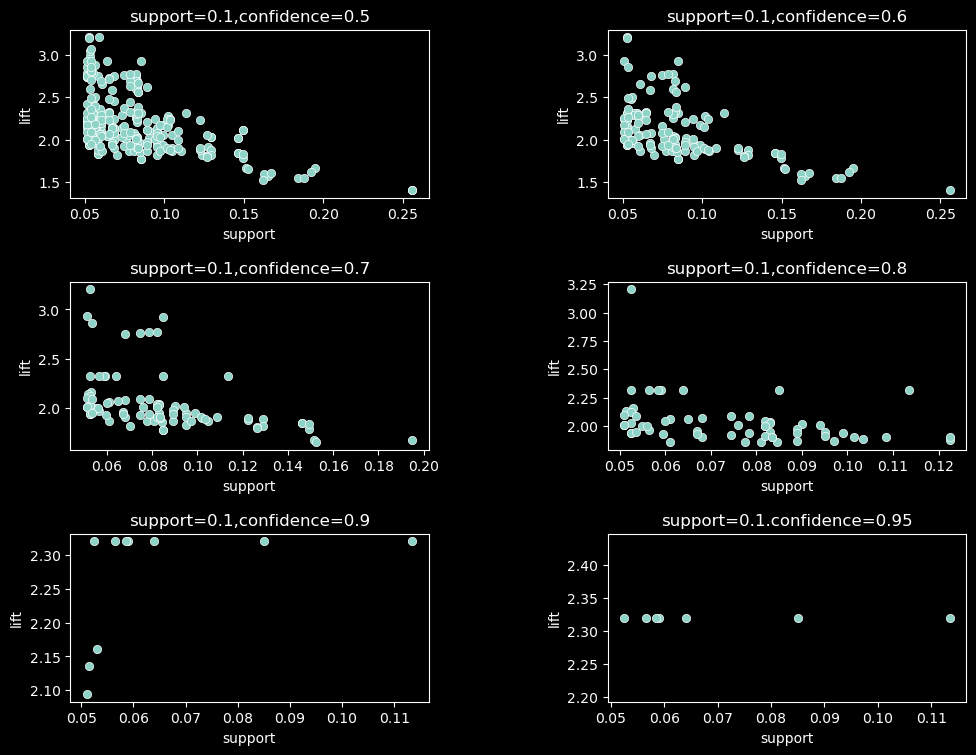

In [112]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.5,top=1.5, wspace=0.5,hspace=0.5)
#fig=plt.figure(figsize=(6,6))
plt.subplot(3,2,1)
sns.scatterplot(x=a_rules.support,y=a_rules.lift)
plt.title('support=0.1,confidence=0.5')
plt.subplot(3,2,2)
sns.scatterplot(x=a_rules1.support,y=a_rules1.lift)
plt.title('support=0.1,confidence=0.6')
plt.subplot(3,2,3)
sns.scatterplot(x=a_rules2.support,y=a_rules2.lift)
plt.title('support=0.1,confidence=0.7')
plt.subplot(3,2,4)
sns.scatterplot(x=a_rules3.support,y=a_rules3.lift)
plt.title('support=0.1,confidence=0.8')
plt.subplot(3,2,5)
sns.scatterplot(x=a_rules4.support,y=a_rules4.lift)
plt.title('support=0.1,confidence=0.9')
plt.subplot(3,2,6)
sns.scatterplot(x=a_rules5.support,y=a_rules5.lift)
plt.title('support=0.1.confidence=0.95')

# for range min_support values between 0.05-0.2 we can see lift>1 at confidence threshold=0.5,0.6,0.7,0.8 
# A lift greater than 1 suggests that the presence of the antecedent increases the chances that the consequent will occur in a given transaction

Text(0.5, 1.0, 'support=0.1.confidence=0.95')

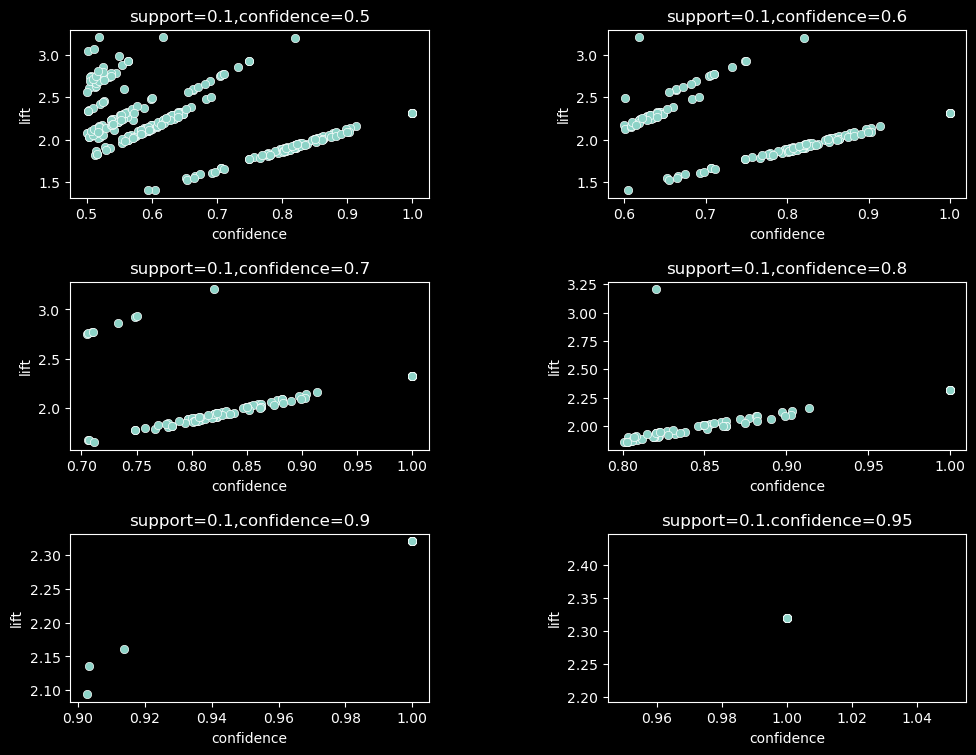

In [114]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.5,top=1.5, wspace=0.5,hspace=0.5)
#fig=plt.figure(figsize=(6,6))
plt.subplot(3,2,1)
sns.scatterplot(x=a_rules.confidence,y=a_rules.lift)
plt.title('support=0.1,confidence=0.5')
plt.subplot(3,2,2)
sns.scatterplot(x=a_rules1.confidence,y=a_rules1.lift)
plt.title('support=0.1,confidence=0.6')
plt.subplot(3,2,3)
sns.scatterplot(x=a_rules2.confidence,y=a_rules2.lift)
plt.title('support=0.1,confidence=0.7')
plt.subplot(3,2,4)
sns.scatterplot(x=a_rules3.confidence,y=a_rules3.lift)
plt.title('support=0.1,confidence=0.8')
plt.subplot(3,2,5)
sns.scatterplot(x=a_rules4.confidence,y=a_rules4.lift)
plt.title('support=0.1,confidence=0.9')
plt.subplot(3,2,6)
sns.scatterplot(x=a_rules5.confidence,y=a_rules5.lift)
plt.title('support=0.1.confidence=0.95')

# lift and confidence has a bleak linear relationship, which means that the most frequent items have some other items associated to it

# Heat map with values of lift>1 for each cases

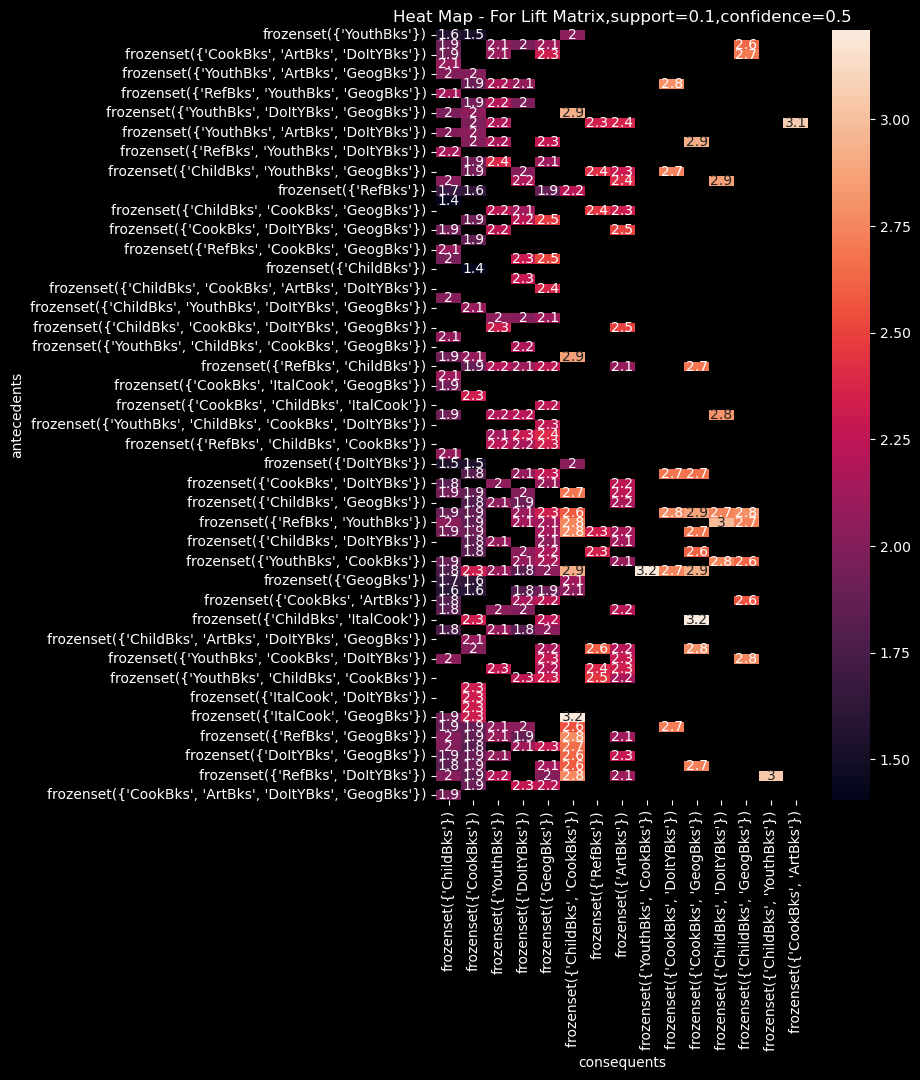

In [115]:
fig=plt.figure(figsize=(6,10))
sns.heatmap(pivot1,annot = True)
plt.title('Heat Map - For Lift Matrix,support=0.1,confidence=0.5')
plt.yticks(rotation=0)
plt.xticks(rotation=90);

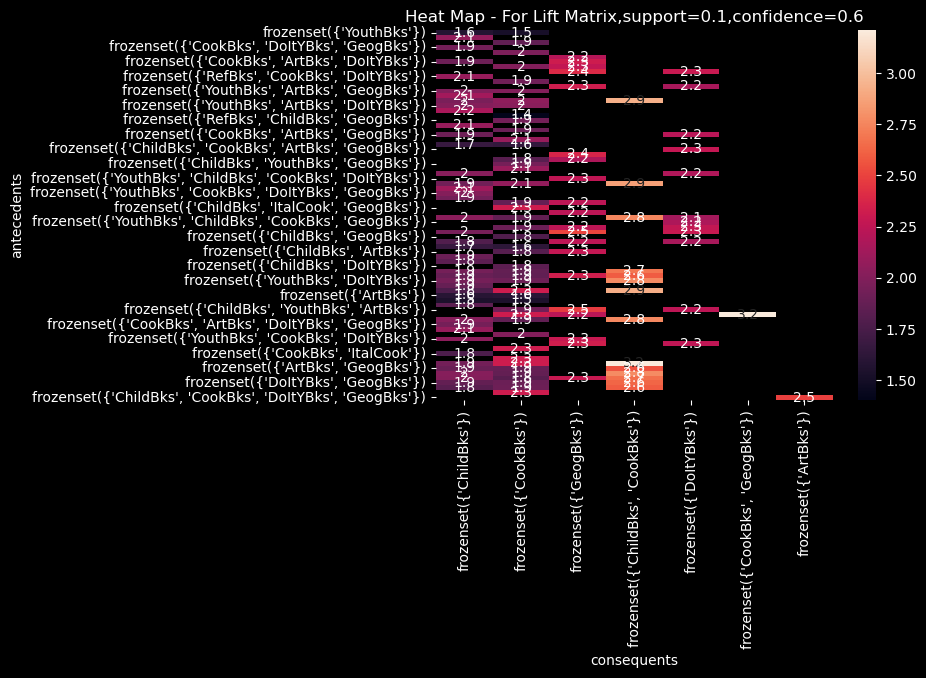

In [116]:
fig,sns.heatmap(pivot2,annot = True)
plt.title('Heat Map - For Lift Matrix,support=0.1,confidence=0.6')
plt.yticks(rotation=0)
plt.xticks(rotation=90);

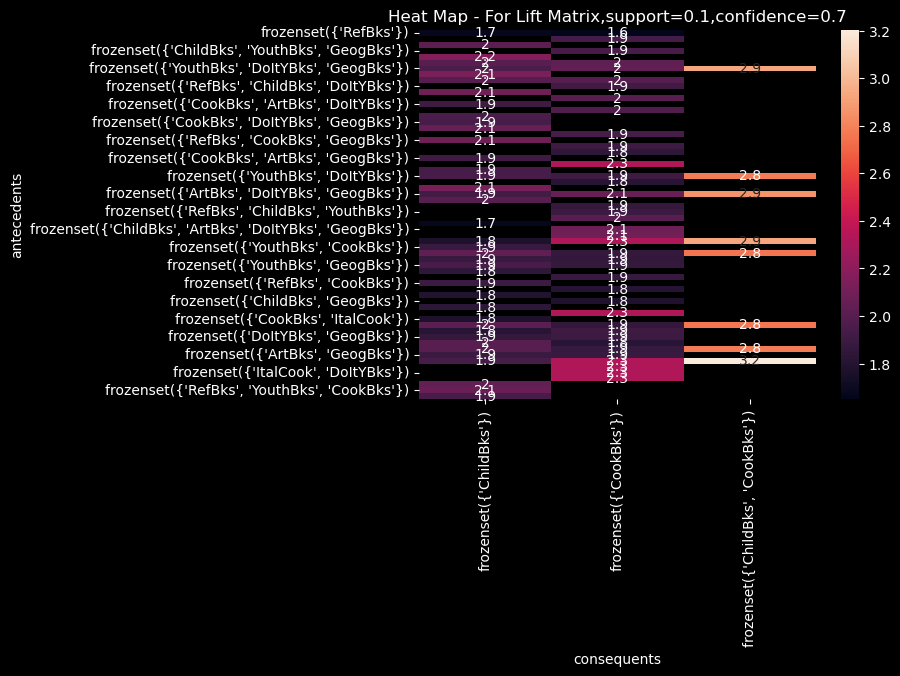

In [117]:
fig,sns.heatmap(pivot3,annot = True)
plt.title('Heat Map - For Lift Matrix,support=0.1,confidence=0.7')
plt.yticks(rotation=0)
plt.xticks(rotation=90);

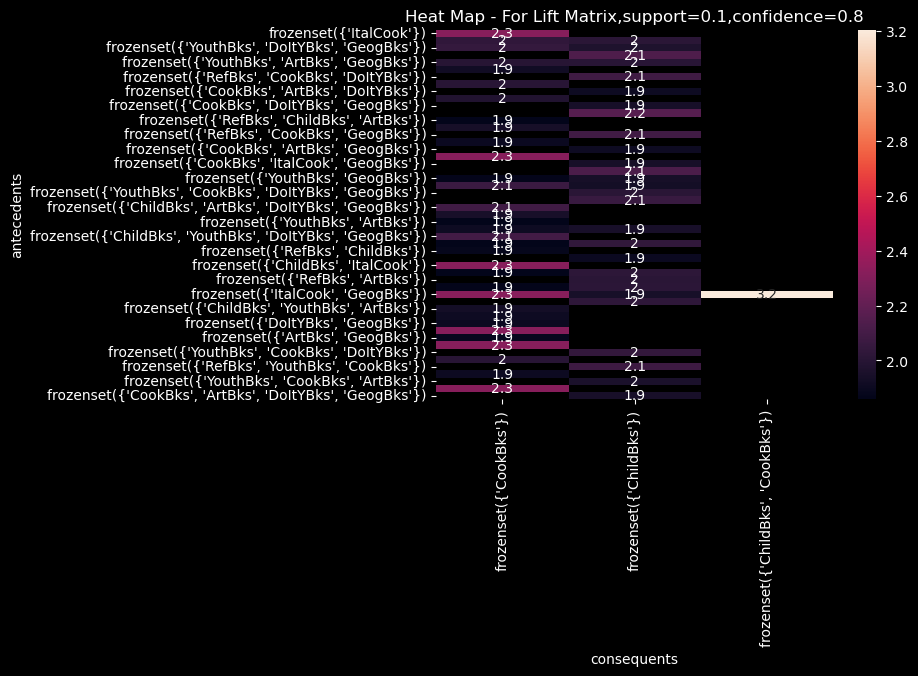

In [118]:
fig,sns.heatmap(pivot4,annot = True)
plt.title('Heat Map - For Lift Matrix,support=0.1,confidence=0.8')
plt.yticks(rotation=0)
plt.xticks(rotation=90);

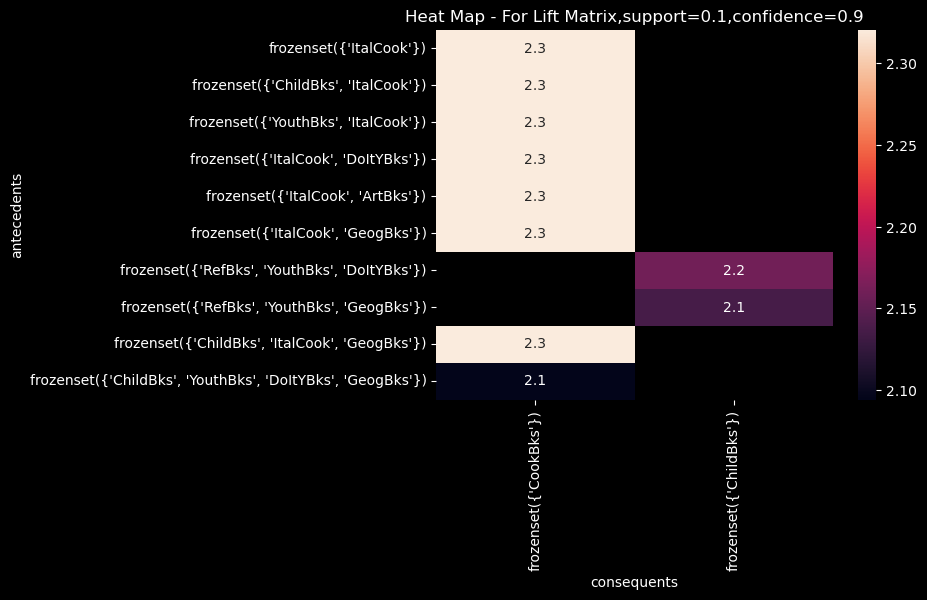

In [119]:
fig,sns.heatmap(pivot5,annot = True)
plt.title('Heat Map - For Lift Matrix,support=0.1,confidence=0.9')
plt.yticks(rotation=0)
plt.xticks(rotation=90);

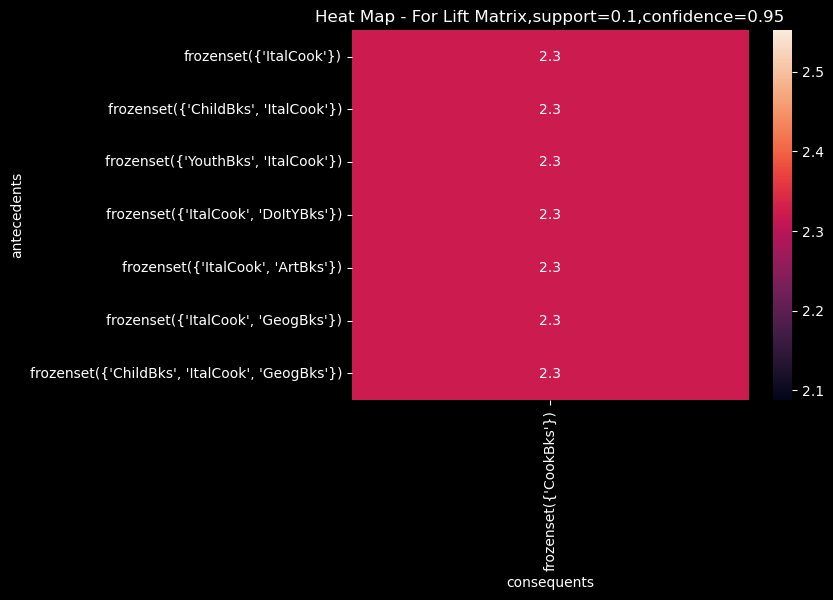

In [120]:
fig,sns.heatmap(pivot6,annot = True)
plt.title('Heat Map - For Lift Matrix,support=0.1,confidence=0.95')
plt.yticks(rotation=0)
plt.xticks(rotation=90);

### >above heat map indicates the lift>1,which means the when antecedent items are bought,
### consequent items appears in given transaction
### As the confidence threshold increases,consequent items are getting decreased for each cases which has lift>1
### >A lift greater than 1 suggests that the presence of the antecedent increases the chances that the consequent will occur in a given transaction
### >from above plots we see values of lift ranges between 1 to 3,Greater lift values indicate stronger associations
### The lift is a value between 0 and infinity

# Association rules-Support=0.15,0.2,0.3,confidence=0.6,0.75,0.8

In [121]:
frequent_items1=apriori(books,min_support=0.1,use_colnames=True)
frequent_items1.head()


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [122]:
a1_rules1=association_rules(frequent_items1,metric='confidence',min_threshold=0.6)
a1_rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427


In [123]:
r1=a1_rules1[a1_rules1['lift']>1]

In [124]:
a1_rules1['lift'].sort_values(ascending=False)

11    2.320186
23    2.274247
28    2.245509
25    2.155264
26    1.906873
27    1.899926
17    1.899004
24    1.891253
29    1.883445
12    1.882497
16    1.876058
22    1.864490
14    1.841017
15    1.840820
21    1.835989
13    1.813963
18    1.806175
19    1.790745
20    1.778809
5     1.670264
3     1.669725
8     1.649549
10    1.618245
9     1.607763
4     1.594028
0     1.576044
7     1.542677
2     1.542511
6     1.518667
1     1.404179
Name: lift, dtype: float64

In [125]:
pivot11=r1.pivot(index='antecedents', columns='consequents', values='lift')

In [126]:
a2_rules2=association_rules(frequent_items1,metric='confidence',min_threshold=0.8)
r2=a2_rules2[a2_rules2['lift']>1]
pivot22=r2.pivot(index='antecedents', columns='consequents', values='lift')

In [127]:
frequent_items2=apriori(books,min_support=0.3,use_colnames=True)
frequent_items2

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


# support and lift

Text(0.5, 1.0, 'support=0.15,confidence=0.6')

<Figure size 640x480 with 0 Axes>

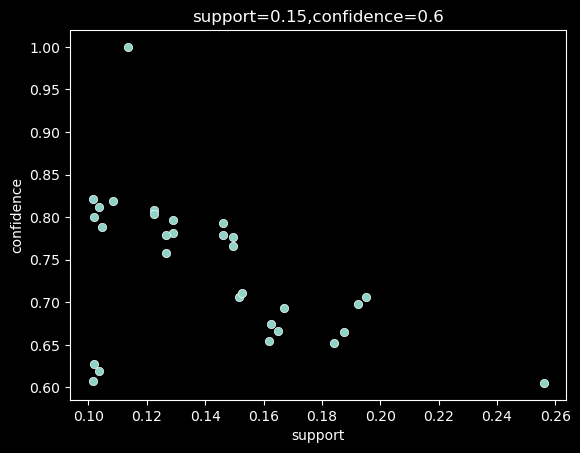

In [129]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.5,top=1.5, wspace=0.5,hspace=0.5)
#fig=plt.figure(figsize=(6,6))
plt.subplots(1)
sns.scatterplot(x=a1_rules1.support,y=a1_rules1.confidence)
plt.title('support=0.15,confidence=0.6')



# Support and confidence has a no linear relationship

# support vs lift

Text(0.5, 1.0, 'support=0.15,confidence=0.6')

<Figure size 640x480 with 0 Axes>

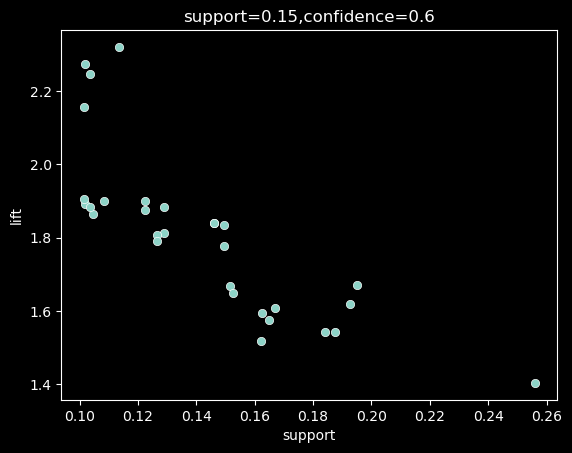

In [130]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.5,top=1.5, wspace=0.5,hspace=0.5)
#fig=plt.figure(figsize=(6,6))
plt.subplots(1)
sns.scatterplot(x=a1_rules1.support,y=a1_rules1.lift)
plt.title('support=0.15,confidence=0.6')



# confidence vs lift

Text(0.5, 1.0, 'support=0.15,confidence=0.6')

<Figure size 640x480 with 0 Axes>

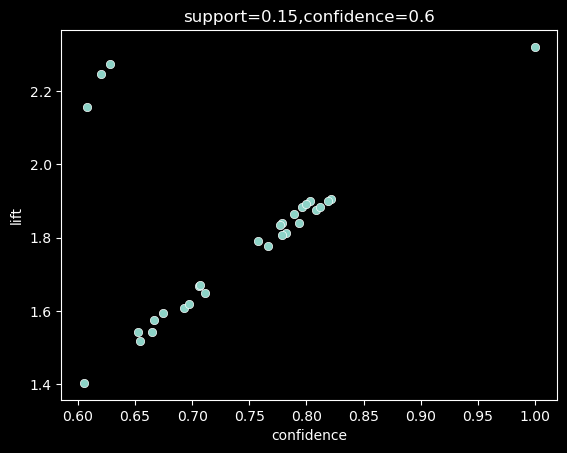

In [131]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.5,top=1.5, wspace=0.5,hspace=0.5)
#fig=plt.figure(figsize=(6,6))
plt.subplots(1)
sns.scatterplot(x=a1_rules1.confidence,y=a1_rules1.lift)
plt.title('support=0.15,confidence=0.6')


# When it come to lift and confidence there is has linear relationship

### Support is an indication of how frequently the items appear in the data,items with min_support 0.4 repeated in data
### confidence with threshold 0.5,0.6,0.7,0.8
### Confidence indicates the number of times the if-then statements are found true

# Heat map with values of lift>1

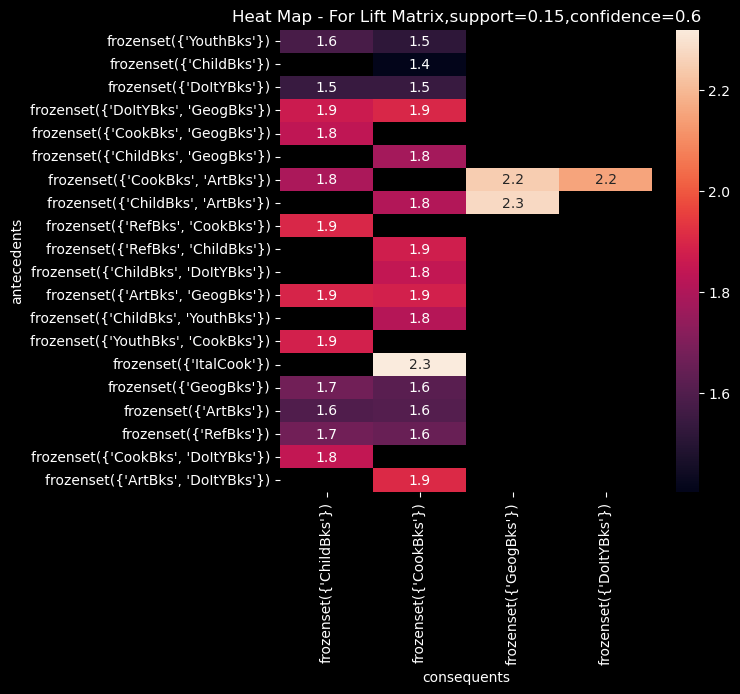

In [133]:
fig=plt.figure(figsize=(6,6))
sns.heatmap(pivot11,annot = True)
plt.title('Heat Map - For Lift Matrix,support=0.15,confidence=0.6')
plt.yticks(rotation=0)
plt.xticks(rotation=90);

## from above plots we see values of lift ranges between 1 to 2.3,
## as  min_support value of  items increased,the no of frequent items sets are getting decresed for confidence of 0.6,0.75,0.8 for respective min support
## greater lift values indicate stronger associations.

# min_support=0.1,max_len=3,min_threshold=0.6

In [135]:
freq_items=apriori(books,min_support=0.1,max_len=3,use_colnames=True)
freq_items.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [136]:
rules_n1=association_rules(freq_items,metric='confidence',min_threshold=0.6)

In [137]:
rn1=rules_n1[rules_n1['lift']>1]

In [138]:
pivot_n1=rn1.pivot(index='antecedents', columns='consequents', values='lift')

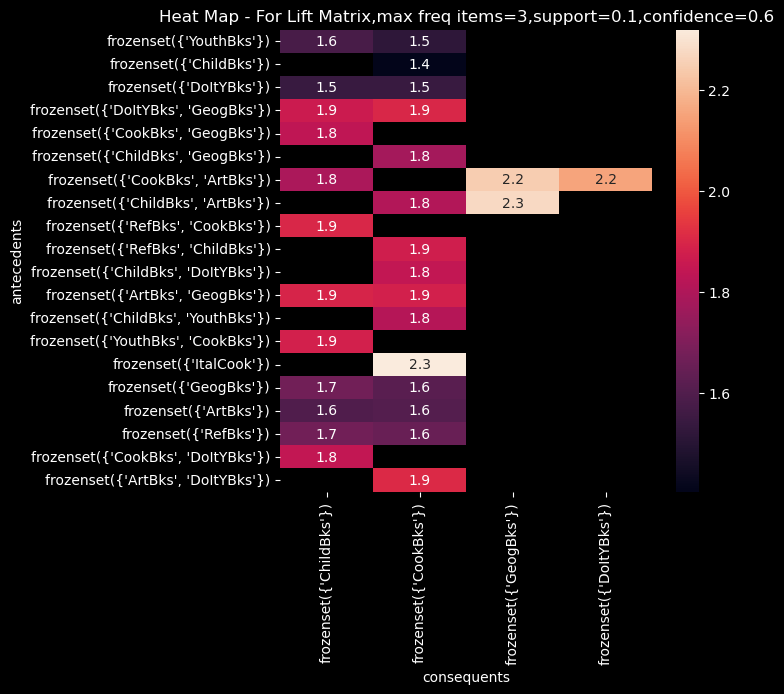

In [139]:
fig=plt.figure(figsize=(6,6))
sns.heatmap(pivot_n1,annot = True)
plt.title('Heat Map - For Lift Matrix,max freq items=3,support=0.1,confidence=0.6')
plt.yticks(rotation=0)
plt.xticks(rotation=90);

# min_support=0.2,max_len=4,min_threshold=0.6

In [140]:
freq_items1=apriori(books,min_support=0.2,max_len=4,use_colnames=True)
freq_items1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [141]:
rules_n2=association_rules(freq_items1,metric='confidence',min_threshold=0.6)
rn2=rules_n2[rules_n2['lift']>1]
pivot_n2=rn2.pivot(index='antecedents', columns='consequents', values='lift')

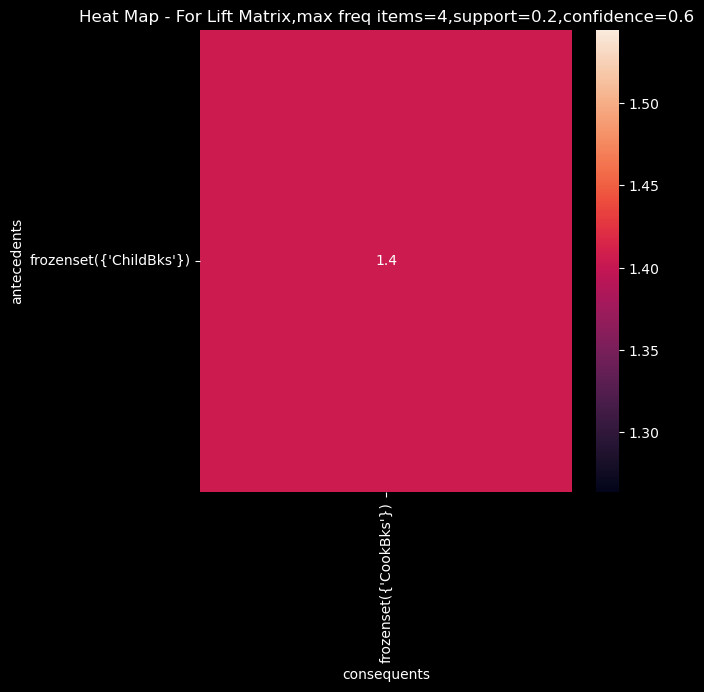

In [142]:
fig=plt.figure(figsize=(6,6))
sns.heatmap(pivot_n2,annot = True)
plt.title('Heat Map - For Lift Matrix,max freq items=4,support=0.2,confidence=0.6')
plt.yticks(rotation=0)
plt.xticks(rotation=90);